# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

/Users/faisal/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
#display(data.describe())

#Display with totals to get an idea of total variation as well
display(np.round(data.join(pd.Series(data.sum(axis=1), name='Totals')).describe(), 2))

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
count     440.00    440.00    440.00    440.00            440.00   
mean    12000.30   5796.27   7951.28   3071.93           2881.49   
std     12647.33   7380.38   9503.16   4854.67           4767.85   
min         3.00     55.00      3.00     25.00              3.00   
25%      3127.75   1533.00   2153.00    742.25            256.75   
50%      8504.00   3627.00   4755.50   1526.00            816.50   
75%     16933.75   7190.25  10655.75   3554.25           3922.00   
max    112151.00  73498.00  92780.00  60869.00          40827.00   

       Delicatessen     Totals  
count        440.00     440.00  
mean        1524.87   33226.14  
std         2820.11   26356.30  
min            3.00     904.00  
25%          408.25   17448.75  
50%          965.50   27492.00  
75%         1820.25   41307.50  
max        47943.00  199891.00

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [270, 200, 419]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
print('Total amount of purchases:')
display(samples.sum(axis=1))
print('Purchases as a % of total:')
display(np.round(100*samples.divide(samples.sum(axis=1), axis=0), 2))

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   4720   1032      975    5500               197            56
1   3067  13240    23127    3941              9959           731
2   8861   3783     2223     633              1580          1521

Total amount of purchases:


0    12480
1    54065
2    18601
dtype: int64

Purchases as a % of total:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  37.82   8.27     7.81   44.07              1.58          0.45
1   5.67  24.49    42.78    7.29             18.42          1.35
2  47.64  20.34    11.95    3.40              8.49          8.18

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

**Customer 0:**

This establishment has total purchases that fall in the bottom quartile of all customers, indicating a relatively small establishment.  Their purchases can be broken down in to mostly frozen goods and fresh foods with 44% and 38% of their total purchase respectively.  These stats are consistent with a restaurant that is serving a menu that is some combination of fresh foods and frozen products (possibly meats).

**Customer 1:**

This customer is very different from the first one.  Their order size is relatively large, in the top quartile of all customers.  The breakdown of purchases is spread out between milk, grocery, frozen products and detergents.  The highest is grocery at 43% followed by milk and detergents/paper at 24% and 18% respectively.  These could be representative of a supermarket.


**Customer 2:**

This customer has total purchases falling in the 2nd quartile with a large portion going towards fresh products (48%) followed by milk and grocery products.  This one is a little difficult to predict but it may indicate some type of restaurant of cafe serving fresh food and beverages.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)
testlabel = data['Grocery']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, testlabel, test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.602801978878


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Attempted to predict grocery using the other categories, prediction score on the test set was 0.60, which is relatively high.  This indicates that grocery may not provide additional information on top of what is already included in the other categories.  As a result, based on the initial analysis I would think that this category may not be necessary for identifying the spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

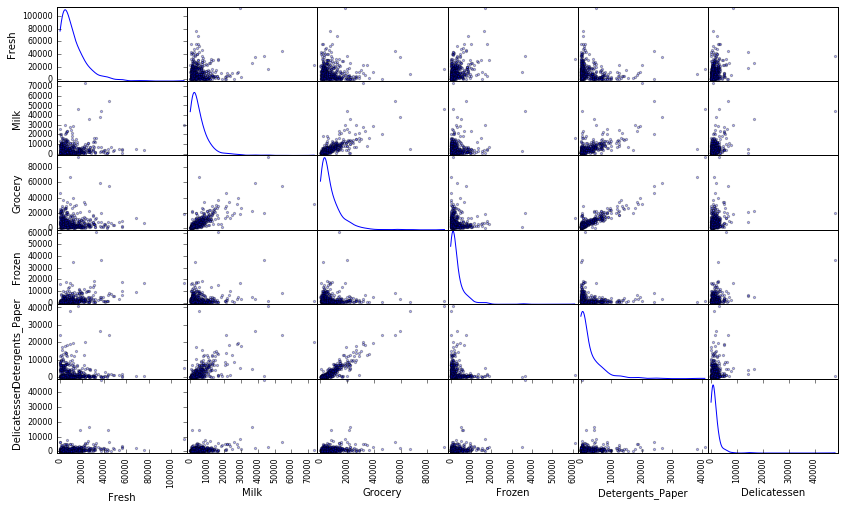

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There appears to be positive correlation between Milk, Detergents_Paper and Grocery as demonstrated in the scatter matrix above.  The correlation between Grocery and the others appears to be quite strong while the correlation between Detergents and Milk looks weaker.  As a result, this does seem to confirm our intuition from the previous question.  The features have all positive values and the distributions resemble Chi Square or lognormal distributions at first glance.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

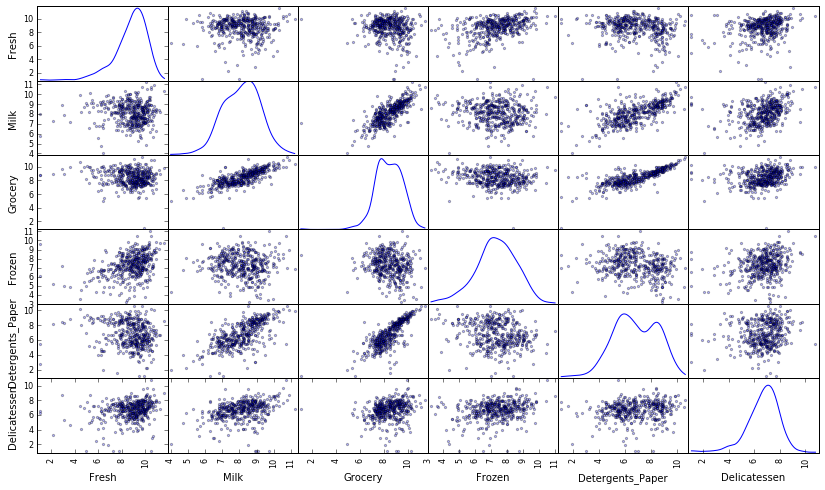

In [7]:
from scipy.stats import boxcox
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.459564  6.939254   6.882437  8.612503          5.283204      4.025352
1  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
2  9.089415  8.238273   7.706613  6.450470          7.365180      7.327123

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [34]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print(str((~((log_data[feature] >= (Q1 - step)) & (log_data[feature] <= (Q3 + step)))).sum()) + " data points considered outliers for the feature '{}':".format(feature))
    #rawvalue = log_data[~((log_data[feature] >= (Q1 - step)) & (log_data[feature] <= (Q3 + step)))][feature]
    #zscore = (rawvalue-log_data[feature].mean())/log_data[feature].std()
    #zscore.name = 'Z-Score'
    #display(pd.DataFrame(rawvalue).join(zscore))
    display((log_data[~((log_data[feature] >= (Q1 - step)) & (log_data[feature] <= (Q3 + step)))][feature]))
    
# OPTIONAL: Select the indices for data points you wish to remove
log_data_q1 = log_data.quantile(0.25)
log_data_q3 = log_data.quantile(0.75)
step = 1.5*(log_data_q3-log_data_q1)
outliers  = log_data.lt(log_data_q1-step) | log_data.gt(log_data_q3+step)
outliers = outliers.sum(axis=1).gt(1)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print('Final Points Removed:')
print(outliers[outliers].index.values)
print('Total observations removed:')
print(outliers.sum())
print('Data description after dropping all outliers:')
good_data.describe()

16 data points considered outliers for the feature 'Fresh':


65     4.442651
66     2.197225
81     5.389072
95     1.098612
96     3.135494
128    4.941642
171    5.298317
193    5.192957
218    2.890372
304    5.081404
305    5.493061
338    1.098612
353    4.762174
355    5.247024
357    3.610918
412    4.574711
Name: Fresh, dtype: float64

4 data points considered outliers for the feature 'Milk':


86     11.205013
98      4.718499
154     4.007333
356     4.897840
Name: Milk, dtype: float64

2 data points considered outliers for the feature 'Grocery':


75     1.098612
154    4.919981
Name: Grocery, dtype: float64

10 data points considered outliers for the feature 'Frozen':


38      3.496508
57      3.637586
65      3.583519
145     3.737670
175     3.951244
264     4.110874
325    11.016479
420     3.218876
429     3.850148
439     4.174387
Name: Frozen, dtype: float64

2 data points considered outliers for the feature 'Detergents_Paper':


75     1.098612
161    1.098612
Name: Detergents_Paper, dtype: float64

14 data points considered outliers for the feature 'Delicatessen':


66      3.295837
109     1.098612
128     1.098612
137     3.583519
142     1.098612
154     2.079442
183    10.777768
184     2.397895
187     1.098612
203     2.890372
233     1.945910
285     2.890372
289     3.091042
343     3.610918
Name: Delicatessen, dtype: float64

Final Points Removed:
[ 65  66  75 128 154]
Total observations removed:
5
Data description after dropping all outliers:


Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  435.000000  435.000000  435.000000  435.000000        435.000000   
mean     8.766671    8.128376    8.460236    7.324601          6.799008   
std      1.423133    1.062911    1.046108    1.261038          1.684562   
min      1.098612    4.718499    5.384495    3.218876          1.098612   
25%      8.073389    7.364809    7.676010    6.647029          5.560615   
50%      9.055439    8.198089    8.467372    7.340187          6.700731   
75%      9.737108    8.877379    9.274768    8.177371          8.277644   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    435.000000  
mean       6.694349  
std        1.261066  
min        1.098612  
25%        6.019808  
50%        6.874198  
75%        7.509609  
max       10.777768

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are a total of 5 observations considered outliers for the whole dataset.  The categories with the largest number of outliers are Fresh, Delicatessen and Frozen with 16, 14 and 10 outliers respectively.  The remaining categories have a relatively small number with 4, 2 and 2 for Milk, Grocery and Detergents_Paper respectively.  The observations where more than one category recorded an outlier was removed from the dataset and the remaining number of observations are 435.

In general, outliers tend to skew most forms of analysis by distorting parameter estimates, if they are indeed outliers.  The reason why they are removed is because the underlying cause of the discrepancy is most likely something that cannot be expected to repeat.  For instance, in this case study an extremely large value multiple categories could be there because a particular customer had to reorder their entire inventory due to a natural disaster or other circumstance that caused damage to the existing inventory.  This large order cannot be expected to repeat on an ongoing basis and it would make sense to remove it if our goal is to understand and possibly predict future orders.

In our example they could potentially affect the cluster centers and the eventual assignments.  Removing observations where outliers, as defined by Tukey's method, appear in under more than one cateogry is a safe way to identify customers that are far away from the norm in more than one area and is unlikely to be a recurring trait.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[  44.3    70.68   82.99   93.11   97.96  100.  ]


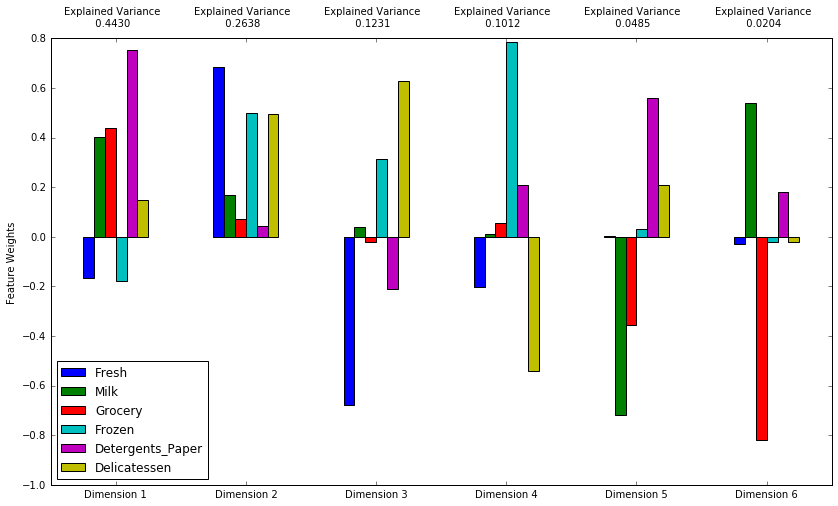

In [18]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print(np.round(100*pca.explained_variance_ratio_.cumsum(), 2))

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first two components combined explain approximately 70.68% of the variance in the data while the first four components explain almost 93.11%.  To understand what each dimension represents, lets consider the first principal component, Dimension 1, which can explain almost 45% of the variation in the data.  The relatively high positive values for Milk, Grocery and Detergents_Paper indicate that those three categories are positively correlated and tend to move together in similar ratios as the weights (in this first dimension).  So in this specific case, a customer with a very high total value of Dimension 1 (and insignificant values for the other components) would be purchasing fresh produce, milk and detergents/paper in a 1:1:2 ratio approximately.

Similarly, in Dimension 2 the positive weights for Fresh, Frozen and Delicatessen indicate that these three categories are positively correlated in this dimension and tend to move up and down together.  Observations with increasing values in this dimension can be expected to have increasing values in these categories in the same proportions as the weights, all else equal.

For dimension 3, there are two significant weights, Fresh at -0.6 and Delicatessen at 0.6 approximately.  For this component, purchases of Fresh would decrease the value for this dimension while a negative value (which does not imply a negative absolute purchase) would increase the dimension value.  Observations with a high value only in this dimension would be purchasing Delicatessen but not Fresh in larger than normal values.  Those two categories are negatively correlated in this component.

Finally, dimension 4 has significant positive weight in Frozen while a negative weight in Delicatessen (Detergents_Paper can be argued to also play a role but not as important as the other two).  In this dimension these two categories are negatively correlated and to get a high value in this dimension an observation would need to have a high value in Frozen but a low value in Delicatessen.

As a final note, our intuition tells us that these components shoule be able to describe different types of customers.  For instance, if we saw an observation with high values for both Dimension 1 and Dimension 2, we might expect that customer to be a supermarket, as they are the type of customers that would purchase all types of categories.  Similarly, other types of establishments may consist of a particular combination of the components (or a specific component only).

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.8857      -1.2597      -0.7599       2.1010       0.0534   
1       2.9903       0.3645       0.2521       1.5653      -0.1922   
2       0.3359       0.0856      -0.1970      -1.0176       0.6091   

   Dimension 6  
0       0.4110  
1      -0.1244  
2       0.7771

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.8857      -1.2597
1       2.9903       0.3645
2       0.3359       0.0856

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-means is a relatively fast alogorithm and works well for large sample sizes.  It is also intuitive and easy to understand the concept of minimizing the sum of squares for each cluster center and works well when we have enough knowledge to assert a certain number of clusters.  K-means also forces data points in to a cluster, with no overlap.

The Gaussian Mixture Model (GMM) has the advantage of allowing for soft clusters, also providing a confidence level for each observation via the liklihood estimates.  This technique accepts the possibility that not all observations may fit a cluster equally and that there are going to be problem points that may difficult to assign.  Furthermore, it also accepts the reality that there is a chance, however small, that a particular observation could actually be part of any of the clusters.  K-means can actually be thought of as a special edge case of GMM.

In this example, there is no reason to assume that customer's fall under specific criteria.  The business world consists of a diverse set of companies, each providing various types of services and it would not be surprising to find observations that are not centered around particular clusters.  Furthermore, given our sample size is not very large and our analysis not time sensitive, it would be nice to take advantage of the soft clustering property of the GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

for c in range(2, 11):
    clusterer = GMM(n_components=c, random_state=0)
    clusterer.fit(reduced_data)
    print('Score for n=' + str(c) + ' is ' + str(silhouette_score(reduced_data, clusterer.predict(reduced_data), random_state=0)))

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.predict(reduced_data), random_state=0)


Score for n=2 is 0.411818864386
Score for n=3 is 0.373560747175
Score for n=4 is 0.308243479507
Score for n=5 is 0.295441470747
Score for n=6 is 0.276478936811
Score for n=7 is 0.323119845936
Score for n=8 is 0.3120673235
Score for n=9 is 0.290997808766
Score for n=10 is 0.311964697843


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhouette score for 2 - 10 components are:

    Score for n=2 is 0.443601474015
    
    Score for n=3 is 0.357294514249
    
    Score for n=4 is 0.291646368377
    
    Score for n=5 is 0.265822254317
    
    Score for n=6 is 0.307122866447
    
    Score for n=7 is 0.295333399467
    
    Score for n=8 is 0.301156045457
    
    Score for n=9 is 0.283717242517
    
    Score for n=10 is 0.262953734885

Based on these score, 2 components has the highest score with a coefficient of 0.44 and that is the parameter that has been set for the final model.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

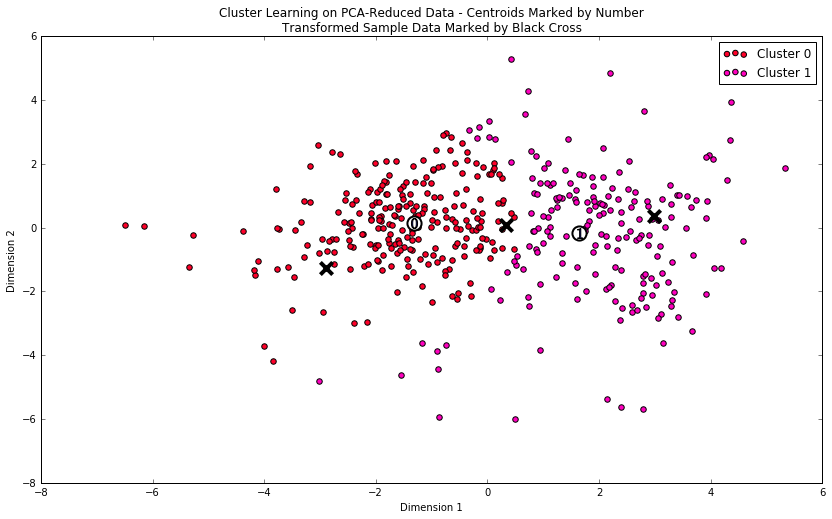

In [23]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers.join(pd.Series(true_centers.sum(axis=1), name='Total')))

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
Segment 0  8812.0  2052.0   2689.0  2058.0             337.0         712.0   
Segment 1  4316.0  6347.0   9555.0  1036.0            3046.0         945.0   

             Total  
Segment 0  16660.0  
Segment 1  25245.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 has relatively higher values in Fresh, Milk, Grocery and Frozen with lower values in Detergents_Paer and Delicatessen.  Despite being concentrated in these categories, the actual value for Fresh is close to the Median for the whole sample while Milk and Grocery is lower than the median value.  Frozen is slightly higher than the median, while all the categories are signficantly less than the mean (these stats include our outliers though).  Finally, the total is also significantly less than the average total for customers.  Given these observations, this segment is most likely a restaurant or cafe that is serving mostly fresh and frozen (likely meats) foods.

Segment 1 has high values, compared to Segment 0, for all categories except Frozen and Fresh.  Besides those two categories, most of the values are signficantly higher than the median values for the entire sample.  The total sum is also closer to the median value.  This is representative of a supermarket that is placing relatively large orders for most product categories.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

The first and last sample points are predicted to be part of Cluster 0.  Our predictions for both of these points was that they were mostly likely some sort of restaurant or cafe, which is consistent with our analysis for the type of establishment that Cluster 0 represents.

Point 1 was predicted to be a supermarket, this is also consistent with our analysis of Cluster 1 in the previous question.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The company can set up an experiment where they can try switching to a 3 day service for a small number of customers and then compare the impact.  They can structure the test such that a null hypothesis predicts no change in customer behaviour while the alternative would be that the change did affect the behaviour.  If the null hypothesis is rejected, the change can be looked at to see whether it was positive or negative; i.e by comparing to the customers that did not receive the change in delivery.  If the customers their is no change in the customer behaviour (or there is an increase in total revenue) the company can take their new delivery service as a success.

In this particular case though, the company must set up two different experiments for both of the customer segments since the change in delivery might have a different impact on each of the segments.  Therefore, they would choose the test samples from both of the segments and have enough unchanged samples from each of the other segments to compare to.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

This can be looked at as a supervised learning problem with our annual spending for each category as the features and the predicted customer segments from the unsupervised learning problems as the labels.  We can then use our supervised learning techniques (training and testing samples, cross validation) to train the model and get the parameter estimates.  Finally, we can use this model to classify the new customers in to each segment.

Alternatively we can use our unsupervised learning model to see where the new data points would fall buy going through the process of finding the corresponding values for the principal components and then finding the best customer segment they identify with.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

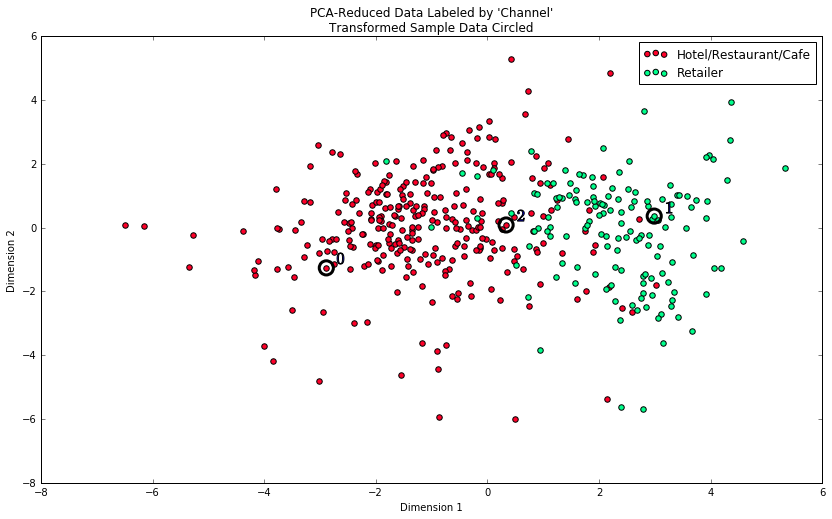

In [26]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The unsupervised learning exercise did surprisingly (for me) well.  The predicted two segments resemble the underlying structure very closely both in the number of segments and the overall assigned categories.  In the underlying distribution, the retailers are almost never negative in dimension 1, with none with values lower than -2.  Therefore we could say that these are considered to be purely hotels/restaurants.  Our sample points were also classified correctly using the GMM model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.